# 凯斯西储大学（CWRU）轴承数据解读
- 一个文件对应一种轴承故障形式的数据集，且文件名为故障形式的编号;
- 文件中是用户字典的形式保存的，DE表驱动端数据，FE表风扇端数据，BA表基座端数据，RPM表转速;
键为'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'的数据都是一维向量

In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
 
file_names = ['97.mat','105.mat','118.mat','130.mat','169.mat','185.mat','197.mat','209.mat','222.mat','234.mat']
 
for file in file_names:
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']
['__header__', '__version__', '__globals__', 'X169_DE_time', 'X169_FE_time', 'X169_BA_time', 'X169RPM']
['__header__', '__version__', '__globals__', 'X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
['__header__', '__version__', '__globals__', 'X197_DE_time', 'X197_FE_time', 'X197_BA_time', 'X197RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X2

- 键为'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'的数据都是一维时间序列向量;
- 这些一维时间序列向量的元素都是振动加速度，index代表采样时间点的顺序；

下图的振动信号部分数据以时域显示；（个人考虑按时间段分割对象）

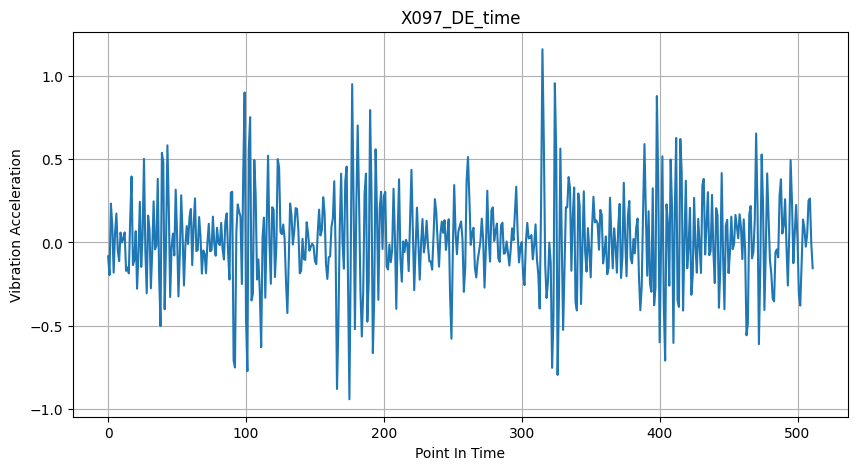

In [4]:
# 采用驱动端数据
data_columns = ['X097_DE_time', 'X105_DE_time', 'X118_DE_time', 'X130_DE_time', 'X169_DE_time',
                'X185_DE_time', 'X197_DE_time', 'X209_DE_time', 'X222_DE_time', 'X234_DE_time']
columns_name = ['97', '105', '118', '130', '169', '185', '197', '209', '222', "234"]
data_12k_10c = pd.DataFrame()
for index in range(10):
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file_names[index]}')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_10c[columns_name[index]] = dataList[:119808]  # 121048  min: 121265
    
# 下图的振动信号部分数据以时域显示
series=data_12k_10c['105'].iloc[:512]
# 绘制Series数据
plt.figure(figsize=(10, 5))
plt.plot(series.index, series.values)

# 添加标题和标签
plt.title('X097_DE_time')
plt.xlabel('Point In Time')
plt.ylabel('Vibration Acceleration')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

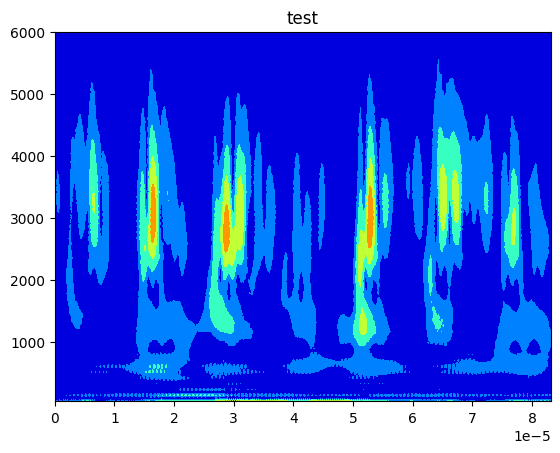

In [5]:
import pywt

# 连续小波变换参数设置
sampling_period = 1.0 / 12000 # 假设采样周期为1/12000（时间步长）;(每秒采样12000次)
wavename = 'cmor1-1'  # 选择小波基函数，例如cmor1-1小波
totalscal = 128  #总尺度为 128
fc = pywt.central_frequency(wavename)#计算小波基函数的中心频率 fc
cparam = 2 * fc * totalscal  #然后根据 totalscal 计算参数 cparam
scales = cparam / np.arange(totalscal, 0, -1)  # 尺度参数范围;通过除以 np.arange(totalscal,0,-1)来生成一系列尺度值，存储在scales 中

# 进行连续小波变换
coefficients, frequencies = pywt.cwt(series, scales, wavename, sampling_period)
coefficients_temp=coefficients.reshape(128,512)
# 计算变化系数的幅度
amp=abs(coefficients_temp)
frequ_max=frequencies.max()
#根据采样周期sampling_period生成时间轴t
t=np.linspace(0,sampling_period,512,endpoint=False)
plt.contourf(t,frequencies,amp,cmap='jet')
plt.title("test")
plt.show()


In [6]:
series

0     -0.083004
1     -0.195734
2      0.233419
3      0.103958
4     -0.181115
         ...   
507    0.046944
508    0.251774
509    0.263795
510   -0.008122
511   -0.154313
Name: 105, Length: 512, dtype: float64